In [412]:
import seaborn as sns
import pandas as pd
data = sns.load_dataset("titanic")

#description of columns 
survived = servives status in the titanic ship 

pclass = passenger class in the titanic ship 

sex = mal / female

age 

sibsp = individual is traveling with sibling or spouse 

parch = individual is traveling with parent or children 

fare = ticket fare of titanic ship 

embarked = onbording location of the titanic ship 

class = passenger class of the titanic ship / repeated column as pclass

who =  repeated column as sex

adulte_male =  repeated column as sex

deck = deck of the ship. we will have to check whether the deck position is related to survival status or not.

embark_town = repeated column as embarked

alive = repeated column as survived

alone = repeated column as sibsp and parch 

In [415]:
data 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [417]:
data.fare.mean()

32.204207968574636

In [419]:
data.fare.median()

14.4542

In [421]:
data.fare.mode()

0    8.05
Name: fare, dtype: float64

In [423]:
data.sex.mode()

0    male
Name: sex, dtype: object

In [425]:
data.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [427]:
577+314

891

In [429]:
data.embarked.mode()

0    S
Name: embarked, dtype: object

In [431]:
data.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [435]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [437]:
# counts the number of missing values from each of the coloumn of the data set 

In [439]:
data.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [441]:
# counts the number of distinct categories and how many are present on each category 

In [443]:
import matplotlib.pyplot as plt

In [445]:
#matplotlib vizualisation librarry 

In [447]:
# Group by Deck and calculate the survival rate 
deck_survival = data.groupby('deck')['survived'].mean().reset_index() 
deck_survival

C:\Users\yasmi\AppData\Local\Temp\ipykernel_13576\2729554554.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deck_survival = data.groupby('deck')['survived'].mean().reset_index()


,deck,survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000


C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


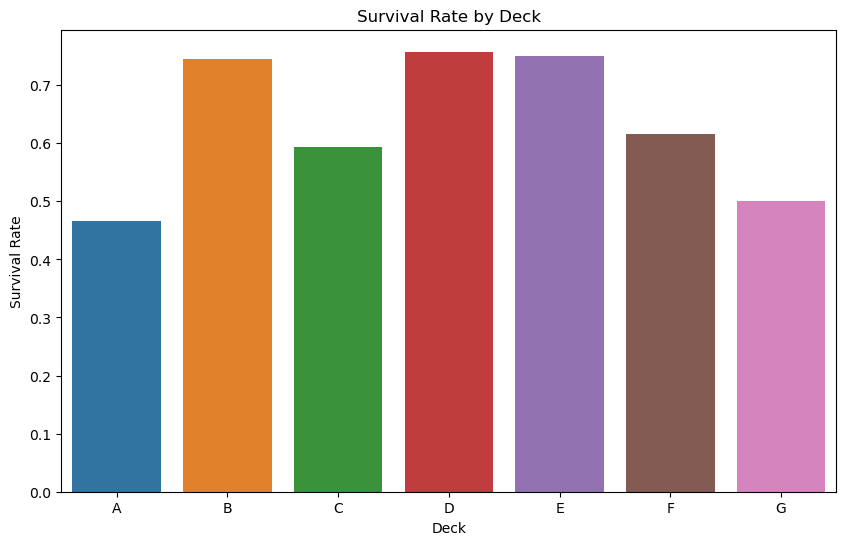

In [449]:
plt.figure(figsize=(10, 6)) 
sns.barplot(data=deck_survival, x='deck', y='survived') 
plt.title('Survival Rate by Deck') 
plt.xlabel('Deck') 
plt.ylabel('Survival Rate') 
plt.show()

In [451]:
#filling the missing values in age coloumn with the help of median 

In [453]:
data.age.fillna(data.age.median(),inplace=True)

In [455]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [457]:
data.deck.fillna(data.deck.mode(),inplace=True)

In [459]:
data.deck.value_counts()

deck
C    60
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [461]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           687
embark_town      2
alive            0
alone            0
dtype: int64

In [463]:
data['deck'] = data['deck'].fillna("D")

In [465]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [467]:
#imputing the missing value of embarked coloumn with the help of mode 

In [469]:
data['embarked'] = data['embarked'].fillna("S")

In [471]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [473]:
data.embarked.value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [475]:
data.embarked.mode()

0    S
Name: embarked, dtype: object

In [477]:
print(data.duplicated().sum())

111


In [479]:
# Checking for duplicates

In [481]:
data.drop_duplicates(inplace=True)

In [483]:
# Drop duplicate rows if any

In [485]:
#dropping the repeated coloumns because they are redundant #class #who #adult_male #embark_town #alive #alone

In [487]:
data.drop(['who','class','adult_male','embark_town','alive','alone'], axis=1, inplace=True)

In [489]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,C
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,D
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,D
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,D
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,28.0,1,2,23.4500,S,D
889,1,1,male,26.0,0,0,30.0000,C,C


In [491]:
#all the repeated coloumn are remouved from the data set

In [493]:
#apply encoding to titanic data 

In [495]:
data.sex.value_counts()

sex
male      488
female    292
Name: count, dtype: int64

In [497]:
#we have to do label encoding for the sex coloumn

In [499]:
data.embarked.value_counts()

embarked
S    566
C    155
Q     59
Name: count, dtype: int64

In [501]:
#we have to do label encoding if its 3 or exceeding 3 we can do one hot encoding for embarked coloumn

In [503]:
data.deck.value_counts()

deck
D    610
C     60
B     46
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [505]:
#we have to do one hot encoding for the deck coloumn

In [507]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [509]:
label_encoder = LabelEncoder()

In [511]:
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])

In [513]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,sex_encoded
0,0,3,male,22.0,1,0,7.2500,S,C,1
1,1,1,female,38.0,1,0,71.2833,C,C,0
2,1,3,female,26.0,0,0,7.9250,S,D,0
3,1,1,female,35.0,1,0,53.1000,S,C,0
4,0,3,male,35.0,0,0,8.0500,S,D,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,D,0
887,1,1,female,19.0,0,0,30.0000,S,B,0
888,0,3,female,28.0,1,2,23.4500,S,D,0
889,1,1,male,26.0,0,0,30.0000,C,C,1


In [515]:
data_encoded = pd.get_dummies(data, columns=['deck', 'embarked'], drop_first=True)

In [517]:
data_encoded

,survived,pclass,sex,age,sibsp,parch,fare,sex_encoded,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,1,False,True,False,False,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,0,False,True,False,False,False,False,False,False
2,1,3,female,26.0,0,0,7.9250,0,False,False,True,False,False,False,False,True
3,1,1,female,35.0,1,0,53.1000,0,False,True,False,False,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,1,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,0,False,False,True,False,False,False,True,False
887,1,1,female,19.0,0,0,30.0000,0,True,False,False,False,False,False,False,True
888,0,3,female,28.0,1,2,23.4500,0,False,False,True,False,False,False,False,True
889,1,1,male,26.0,0,0,30.0000,1,False,True,False,False,False,False,False,False


In [519]:
data_encoded.drop(["sex"], axis=1, inplace=True)

In [521]:
data_encoded

,survived,pclass,age,sibsp,parch,fare,sex_encoded,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,False,True,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,0,False,True,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,True,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,False,False,True,False,False,False,True,False
887,1,1,19.0,0,0,30.0000,0,True,False,False,False,False,False,False,True
888,0,3,28.0,1,2,23.4500,0,False,False,True,False,False,False,False,True
889,1,1,26.0,0,0,30.0000,1,False,True,False,False,False,False,False,False


In [523]:
data_encoded =data_encoded.astype("int")

In [525]:
#everything is numerical so python can understand the data 

In [527]:
#dividing the data set into X & Y such that we can apply features scaling on X 

In [529]:
X=data_encoded.drop('survived', axis=1)

In [531]:
X

,pclass,age,sibsp,parch,fare,sex_encoded,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_Q,embarked_S
0,3,22,1,0,7,1,0,1,0,0,0,0,0,1
1,1,38,1,0,71,0,0,1,0,0,0,0,0,0
2,3,26,0,0,7,0,0,0,1,0,0,0,0,1
3,1,35,1,0,53,0,0,1,0,0,0,0,0,1
4,3,35,0,0,8,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,39,0,5,29,0,0,0,1,0,0,0,1,0
887,1,19,0,0,30,0,1,0,0,0,0,0,0,1
888,3,28,1,2,23,0,0,0,1,0,0,0,0,1
889,1,26,0,0,30,1,0,1,0,0,0,0,0,0


In [533]:
y=data_encoded['survived']

In [535]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: survived, Length: 780, dtype: int32

In [537]:
#apply features scaling on X (preprocessing is the library)

In [539]:
from sklearn.preprocessing import MinMaxScaler

In [541]:
scaler = MinMaxScaler()

In [543]:
scaled_data = scaler.fit_transform(X)

In [545]:
scaled_X = pd.DataFrame(scaled_data, 
                         columns=X.columns)

In [547]:
scaled_X

,pclass,age,sibsp,parch,fare,sex_encoded,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_Q,embarked_S
0,1.0,0.2750,0.125,0.000000,0.013672,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.4750,0.125,0.000000,0.138672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.3250,0.000,0.000000,0.013672,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.4375,0.125,0.000000,0.103516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.4375,0.000,0.000000,0.015625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.0,0.4875,0.000,0.833333,0.056641,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
776,0.0,0.2375,0.000,0.000000,0.058594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
777,1.0,0.3500,0.125,0.333333,0.044922,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
778,0.0,0.3250,0.000,0.000000,0.058594,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [549]:
#breaking dataset to train and test to 75% train data and 25% test data 

In [551]:
from sklearn.model_selection import train_test_split

In [553]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.25, random_state=91)

In [555]:
#apply the model on train data after importing the same

In [557]:
X_train, X_test, y_train, y_test

(     pclass     age  sibsp     parch      fare  sex_encoded  deck_B  deck_C  \
 248     0.5  0.4500  0.000  0.000000  0.019531          1.0     0.0     0.0   
 774     0.5  0.3500  0.000  0.000000  0.019531          1.0     0.0     0.0   
 113     0.5  0.2625  0.250  0.000000  0.142578          1.0     0.0     0.0   
 337     0.0  0.3000  0.000  0.000000  0.134766          0.0     1.0     0.0   
 277     1.0  0.2875  0.000  0.000000  0.013672          1.0     0.0     0.0   
 ..      ...     ...    ...       ...       ...          ...     ...     ...   
 494     1.0  0.2750  0.000  0.000000  0.013672          1.0     0.0     0.0   
 116     0.0  0.6750  0.000  0.166667  0.150391          1.0     0.0     0.0   
 210     1.0  0.2750  0.000  0.000000  0.017578          1.0     0.0     0.0   
 686     0.0  0.5375  0.000  0.166667  0.412109          0.0     1.0     0.0   
 178     1.0  0.5000  0.125  0.166667  0.029297          1.0     0.0     0.0   
 
      deck_D  deck_E  deck_F  deck_G  

In [559]:
#building the model

In [561]:
from sklearn.linear_model import LogisticRegression

In [563]:
#logistic regression model = its a statistical method for a binary (multiclass problems are also feasible with help logistic regression) classification (target is categorical variable) problems. here the response variable 
#(depedent variable) is categorical with only two possible outcomes , coded as 0 & 1. this models the probability of occurence of a certain event. it predicts 
#the probability that a given input belongs to a specified category.

In [565]:
lr=LogisticRegression(solver='liblinear')

In [567]:
#applying the saved instence lr with the help of train data to train the model based on historical paterns 

In [569]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [571]:
#examin the data and predict based on test data

In [573]:
y_pred=lr.predict(X_test)

In [575]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [577]:
#finding the accuracy of the model results (metrics is the library)

In [579]:
from sklearn import metrics

In [581]:
from sklearn.metrics import accuracy_score

In [583]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7846153846153846


In [585]:
#application of evaluation metrics 

In [587]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [589]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7846153846153846


In [591]:
print('precision_score:',metrics.precision_score(y_test, y_pred))

precision_score: 0.7625


In [593]:
print('recall_score:',metrics.recall_score(y_test, y_pred))

recall_score: 0.7261904761904762


In [595]:
print('f1:',metrics.f1_score(y_test, y_pred))

f1: 0.7439024390243903


In [597]:
#precision score higher than recall score 

In [599]:
#classification matrix - confusion matrix 

In [601]:
from sklearn.metrics import classification_report

In [603]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       111
           1       0.76      0.73      0.74        84

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195



In [605]:
#applying decision tree in a classifier model

In [607]:
# Initialize the model

In [609]:
from sklearn.tree import DecisionTreeClassifier

In [611]:
clf = DecisionTreeClassifier(random_state=42)

In [613]:
# Train the model

In [615]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [617]:
# Predict on the test set

In [619]:
y_pred = clf.predict(X_test)

In [621]:
# Evaluate the model

In [623]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[75 36]
 [30 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       111
           1       0.60      0.64      0.62        84

    accuracy                           0.66       195
   macro avg       0.66      0.66      0.66       195
weighted avg       0.67      0.66      0.66       195


Accuracy Score:
0.6615384615384615


In [625]:
clf.score(X_train, y_train)

0.9726495726495726

In [627]:
clf.score(X_test, y_test)

0.6615384615384615

In [629]:
print("Precision:", precision_score(y_test, y_pred, average='macro'))

Precision: 0.6571428571428571


In [631]:
#we have much overfitting because there is a huge gap between train score and test score while building decision tree model so apply costumization of paraneters 

In [633]:
#apply hyperparameter tuning to resolve the overfitting scenario of the decision tree as much as possible 

In [635]:
# Initialize the model

In [637]:
clf = DecisionTreeClassifier(random_state=42)

In [639]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],

}

In [641]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [643]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [645]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [646]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7811965811965811


In [647]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [648]:
#cv is cross validation

In [649]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [650]:
# Evaluate the best model using cross-validation
best_clf = grid_search.best_estimator_
cv_scores = cross_val_score(best_clf, X, y, cv=cv, scoring='accuracy')

In [651]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv_scores)
print("Mean Cross-Validation Score (Best Model):", cv_scores.mean())

Cross-Validation Scores (Best Model): [0.76282051 0.80128205 0.82692308 0.78846154 0.76282051]
Mean Cross-Validation Score (Best Model): 0.7884615384615384


In [652]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

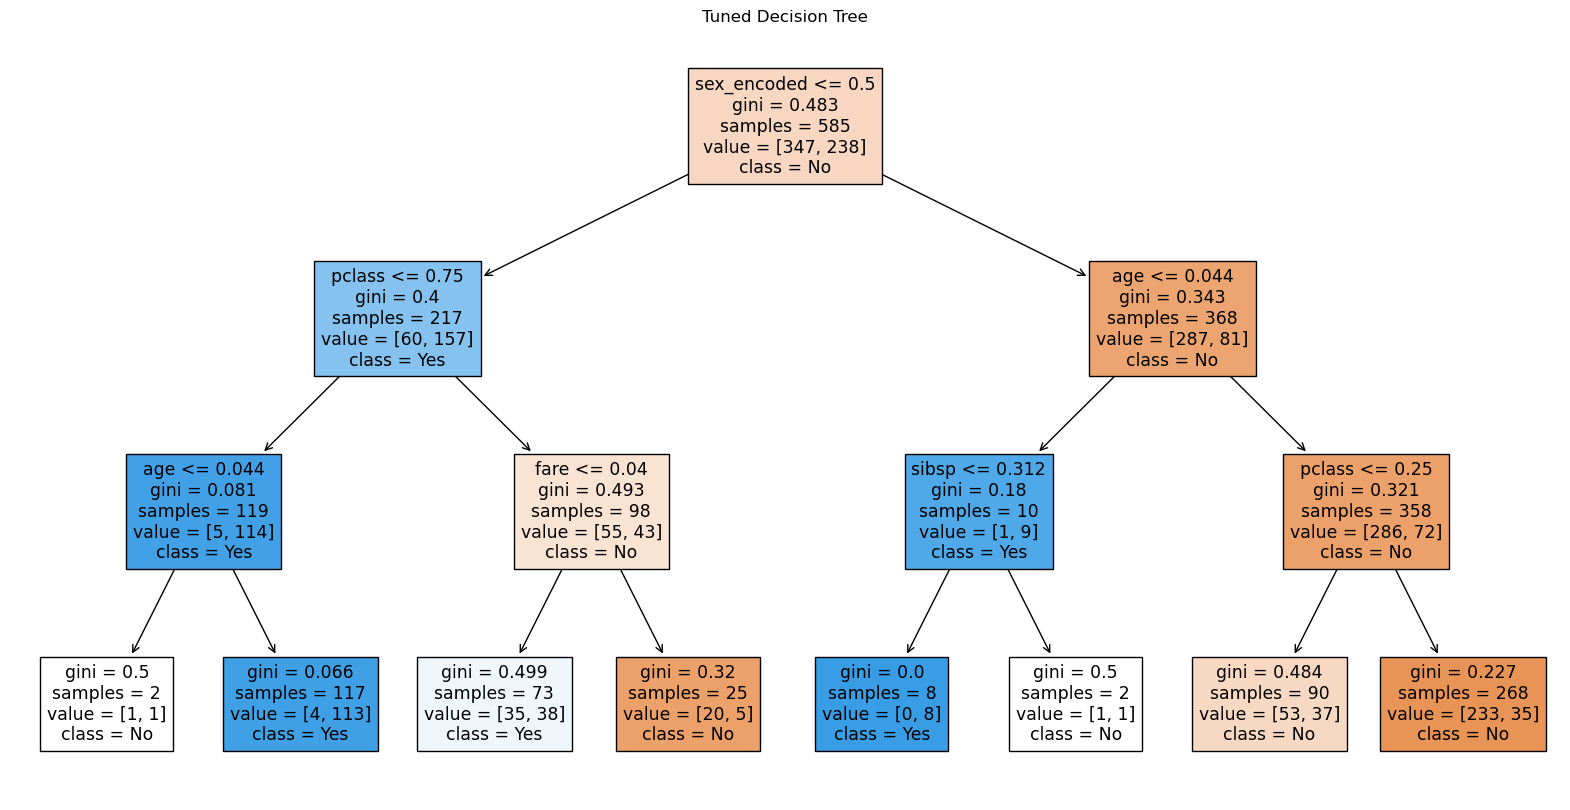

In [653]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Tuned Decision Tree')
plt.show()

In [654]:
# Evaluate the best model on the test set
y_pred_best = best_clf.predict(X_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average=None))
print("Recall:", recall_score(y_test, y_pred_best, average=None))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.8102564102564103
Precision: [0.80327869 0.82191781]
Recall: [0.88288288 0.71428571]
Confusion Matrix:
 [[98 13]
 [24 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       111
           1       0.82      0.71      0.76        84

    accuracy                           0.81       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.81      0.81      0.81       195



Precision for Class 0: a00 / (a00 + a10) = 98 / (98 + 24)

a00 is the number of true positives for Class 0.

a10 is the false positives for Class 0 (instances of Class 1 and Class 2 predicted as Class 0).

Precision for Class 1:a11 / (a11 + a01 + a21) = 60 / (60 + 13 )

a11 is the number of true positives for Class 1. a00 and a10 are the false positives for Class 1 (instances of Class 0 and Class 2 predicted as Class 1).

as validated from python code result precision : [0.80327869 0.82191781] 

In [664]:
98 / (98 + 24)

0.8032786885245902

In [665]:
60 / (60 + 13)

0.821917808219178

Recal for Class 0: a00 / (a00 + a01) = 98 / (98 + 13 )

a00 is the number of true positives for Class 0.

a00 and a01 are the false positives for Class 0 (instances of Class 1 and Class 2 predicted as Class 0).

recal for Class 1: a11 / (a10 + a11 + a12) = 60 / (60 +24)

a11 is the number of true positives for Class 1.

a01 and a21 are the false positives for Class 1 (instances of Class 0 and Class 2 predicted as Class 1).

as validated from python code result Recall: [0.88288288 0.71428571]


In [669]:
98 / (98 + 13 )

0.8828828828828829

In [673]:
60 / (60 +24)

0.7142857142857143

In [675]:
test_score_decisiontreetuned=grid_search.score(X_test, y_test)

In [677]:
test_score_decisiontreetuned

0.8102564102564103

In [679]:
train_score_decisiontreetuned=grid_search.score(X_train, y_train)

In [681]:
train_score_decisiontreetuned

0.7982905982905983

In [683]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 10]

}

In [685]:
param_grid

{'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4, 10]}

In [687]:
grid_search1 = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [689]:
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 10]},
             scoring='accuracy', verbose=1)

In [691]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7811965811965811


In [693]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [695]:
# Evaluate the best model using cross-validation
best_clf1 = grid_search1.best_estimator_
cv1_scores = cross_val_score(best_clf, X, y, cv=cv, scoring='accuracy')

In [697]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv1_scores)
print("Mean Cross-Validation Score (Best Model):", cv1_scores.mean())

Cross-Validation Scores (Best Model): [0.76282051 0.80128205 0.82692308 0.78846154 0.76282051]
Mean Cross-Validation Score (Best Model): 0.7884615384615384


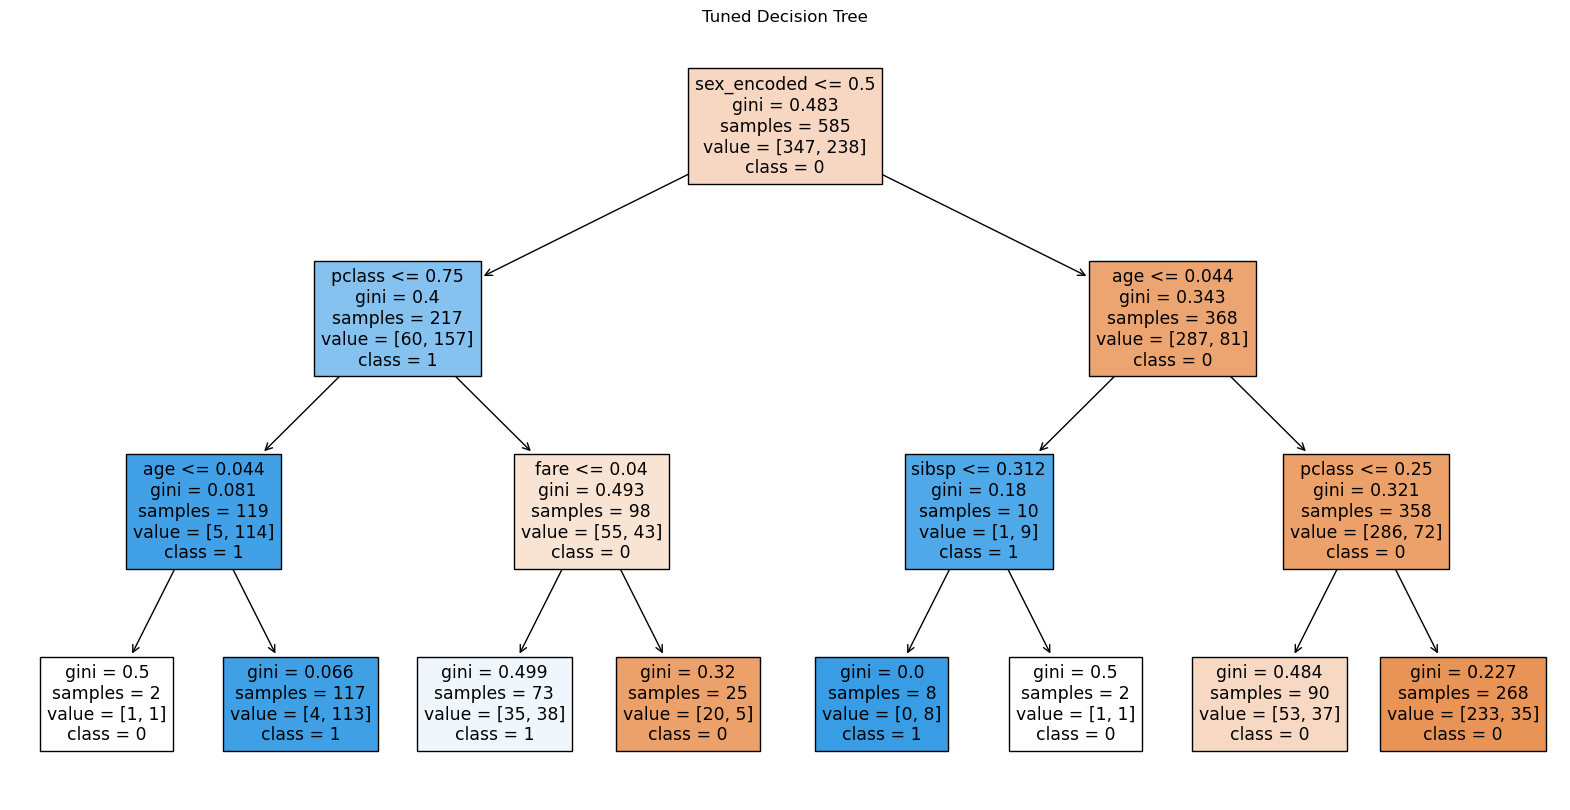

In [699]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf1, filled=True, feature_names=X.columns, class_names=['0', '1','2'])
plt.title('Tuned Decision Tree')
plt.show()

In [700]:
# Evaluate the best model on the test set
y_pred_best = best_clf1.predict(X_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.8102564102564103
Precision: 0.8125982483718841
Recall: 0.7985842985842986
Confusion Matrix:
 [[98 13]
 [24 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       111
           1       0.82      0.71      0.76        84

    accuracy                           0.81       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.81      0.81      0.81       195



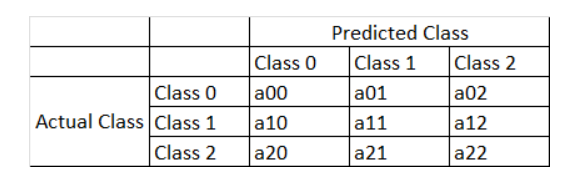

#Interpretation:
a00 = 98 Number of instances where the actual class is Class 0 and the predicted class is also Class 0. This represents the true positives for Class 0.

a01= 13 Number of instances where the actual class is Class 0 but the predicted class is Class 1. This represents the false negatives for Class 0 and false positives for Class 1.

a10 =24 Number of instances where the actual class is Class 1 but the predicted class is Class 0. This represents the false negatives for Class 1 and false positives for Class 0.

a11= 60 Number of instances where the actual class is Class 1 and the predicted class is also Class 1. This represents the true positives for Class 1.


Summary:
True Positives (TP): These are the diagonal elements (98, 60) where the actual class matches the predicted class.

False Positives (FP): These are the off-diagonal elements where the predicted class is incorrect.

For example, for Class 0, the false positives is 98

for class 1 , the false positive are 24

False Negatives (FN): These are the off-diagonal elements where the actual class is incorrect.

For example, for Class 0, the false negatives is 13

for class 1 , the false negative is 60


In [703]:
best_clf1.score(X_test, y_test)

0.8102564102564103

In [705]:
best_clf1.score(X_train, y_train)

0.7982905982905983

In [707]:
#decision tree after doing hyperparameter tuning gives the best accuracy score of 81% without any overfitting

In [709]:
# decision tree give the best model with instance best_clf1 having accuracy score of 81% and no overfitting scenario . below we have tried with rendom forest model where after tuning the parameters overfitting is still noticed . now checking for features importances 

In [711]:
#applying the random forest to check wether the accuracy score is better or not 

In [713]:
from sklearn.ensemble import RandomForestClassifier

In [715]:
rf = RandomForestClassifier(random_state=42)

In [717]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [719]:
y_pred_rf = rf.predict(X_test)

In [721]:
rf.score(X_test, y_test)

0.7435897435897436

In [723]:
rf.score(X_train, y_train)

0.9726495726495726

In [725]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[86 25]
 [25 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       111
           1       0.70      0.70      0.70        84

    accuracy                           0.74       195
   macro avg       0.74      0.74      0.74       195
weighted avg       0.74      0.74      0.74       195


Accuracy Score:
0.7435897435897436


In [727]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [729]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7435897435897436


In [731]:
print('precision_score:', metrics.precision_score(y_test, y_pred_rf,average=None))

precision_score: [0.77477477 0.70238095]


In [733]:
# other option are availble : ['micro', 'macro', 'weighted']

In [735]:
print('recall_score:',metrics.recall_score(y_test, y_pred_rf,average=None))

recall_score: [0.77477477 0.70238095]


In [737]:
print('precision_score:', metrics.precision_score(y_test, y_pred_rf,average='macro'))

precision_score: 0.7385778635778635


In [739]:
print('recall_score:',metrics.recall_score(y_test, y_pred_rf,average='macro'))

recall_score: 0.7385778635778635


In [741]:
print('f1:',metrics.f1_score(y_test, y_pred_rf,average='macro'))

f1: 0.7385778635778635


In [743]:
#apply random forest with hyperparameter tuning

In [745]:
from sklearn.ensemble import RandomForestClassifier

In [747]:
clf_tuned = RandomForestClassifier(random_state=42)

In [749]:
# With Hyperparameter Tuning
param_grid = {
    'n_estimators': [10,15,20],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [751]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [753]:
grid_search1 = GridSearchCV(estimator=clf_tuned, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [755]:
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 15, 20]},
             scoring='accuracy', verbose=1)

In [756]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 15}
Best Cross-Validation Score: 0.8


In [757]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [758]:
#cv is cross validation

In [759]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [760]:
# Evaluate the best model using cross-validation
best_clf_tuned = grid_search1.best_estimator_
cv1_scores = cross_val_score(best_clf_tuned, X, y, cv=cv, scoring='accuracy')

In [761]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv1_scores)
print("Mean Cross-Validation Score (Best Model):", cv1_scores.mean())

Cross-Validation Scores (Best Model): [0.80769231 0.80769231 0.79487179 0.79487179 0.78205128]
Mean Cross-Validation Score (Best Model): 0.7974358974358974


In [762]:
print('precision_score:',metrics.precision_score(y_test, y_pred_rf,average=None))

precision_score: [0.77477477 0.70238095]


In [763]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7435897435897436


In [764]:
print('recall_score:',metrics.recall_score(y_test, y_pred_rf, average='macro'))

recall_score: 0.7385778635778635


In [765]:
print('f1:',metrics.f1_score(y_test, y_pred_rf,average='macro'))

f1: 0.7385778635778635


In [766]:
grid_search1.score(X_test, y_test)

0.7589743589743589

In [767]:
grid_search1.score(X_train, y_train)

0.9076923076923077

In [768]:
#random forest default gives the best accuracy score without overfitting scenario 

In [769]:
# feature importances with the help of random forest 

In [770]:
# training the random forest classifier model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [771]:
# Getting feature importances
importances = rf.feature_importances_

In [772]:
importances

array([0.10154314, 0.29264402, 0.04880618, 0.03853805, 0.20303543,
       0.21826537, 0.01199775, 0.00846232, 0.02406227, 0.01293461,
       0.00257389, 0.00161658, 0.00912423, 0.02639616])

In [773]:
# creating a data frame for feature importances

In [774]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

In [775]:
feature_importances

,feature,importance
0,pclass,0.101543
1,age,0.292644
2,sibsp,0.048806
3,parch,0.038538
4,fare,0.203035
5,sex_encoded,0.218265
6,deck_B,0.011998
7,deck_C,0.008462
8,deck_D,0.024062
9,deck_E,0.012935


In [776]:
# sorting by importance 

In [777]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [778]:
feature_importances

,feature,importance
1,age,0.292644
5,sex_encoded,0.218265
4,fare,0.203035
0,pclass,0.101543
2,sibsp,0.048806
3,parch,0.038538
13,embarked_S,0.026396
8,deck_D,0.024062
9,deck_E,0.012935
6,deck_B,0.011998


In [779]:
# ploting the feature importances 

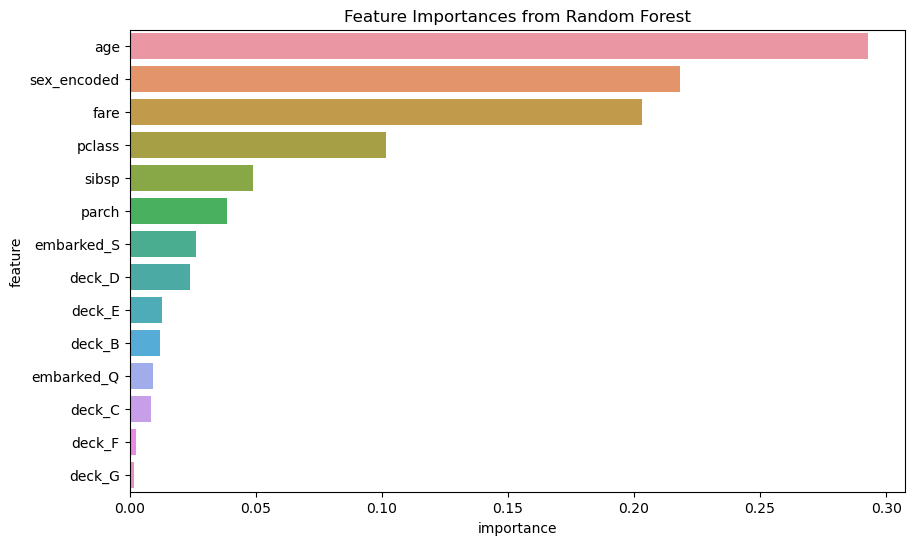

In [780]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()